In [101]:
from scipy import stats
import pandas as pd
import datetime as dt

In [181]:
data = pd.read_csv('data/INO.csv')

In [191]:
training = data[:300]
training = training[['High','Datetime']]
X_training = pd.to_datetime(training['Datetime']).map(dt.datetime.toordinal).values.reshape(-1,1)
y_training = training['High'].values.reshape(-1,1)

In [192]:
testing = data[300:]
testing = testing[['High','Datetime']]
X_testing= pd.to_datetime(testing['Datetime']).map(dt.datetime.toordinal).values.reshape(-1,1)
y_testing = testing[['High']].values.reshape(-1,1)

In [230]:
## 1.Linear Regression

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
reg = LinearRegression().fit(X_training, y_training)

In [197]:
testing['predicted_high'] = reg.predict(X_testing)

<AxesSubplot:>

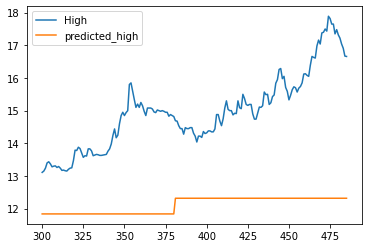

In [198]:
testing.plot()

In [199]:
testing

,High,Datetime,predicted_high
300,13.109800,2020-09-15 11:05:00,11.838358
301,13.150000,2020-09-15 11:10:00,11.838358
302,13.240000,2020-09-15 11:15:00,11.838358
303,13.400000,2020-09-15 11:20:00,11.838358
304,13.435000,2020-09-15 11:25:00,11.838358
...,...,...,...
481,17.219999,2020-09-16 11:25:00,12.318088
482,17.039900,2020-09-16 11:30:00,12.318088
483,16.910000,2020-09-16 11:35:00,12.318088
484,16.670000,2020-09-16 11:40:00,12.318088


In [ ]:
## 2. KNeighborsRegressor

In [200]:
from sklearn.neighbors import KNeighborsRegressor

In [212]:
neigh = KNeighborsRegressor(n_neighbors=2).fit(X_training, y_training)

In [213]:
testing['predicted_high'] = neigh.predict(X_testing)

<AxesSubplot:>

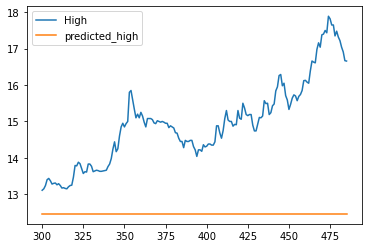

In [214]:
testing.plot()

In [231]:
### 3. SGD

In [221]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [223]:
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_training, y_training.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [224]:
testing['predicted_high'] = reg.predict(X_testing)

<AxesSubplot:>

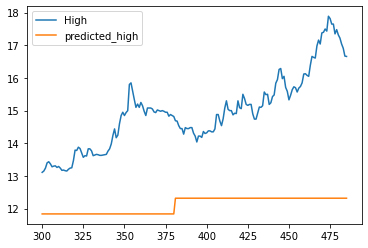

In [225]:
testing.plot()

In [232]:
# we need to do better than this